In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# from autoviz import data_cleaning_suggestions
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus']=False

In [2]:
diabetes=pd.read_excel('C:\\Users\\15295\\Desktop\\统计建模大赛\\dia.xls')

# 数据挖掘

In [3]:
diabetes.info()
# plt.rcParams['axes.facecolor']='#CCCCCC'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   卡号          1006 non-null   int64  
 1   性别          1006 non-null   int64  
 2   年龄          1006 non-null   int64  
 3   高密度脂蛋白胆固醇   1006 non-null   float64
 4   低密度脂蛋白胆固醇   1006 non-null   float64
 5   极低密度脂蛋白胆固醇  1006 non-null   float64
 6   甘油三酯        1006 non-null   float64
 7   总胆固醇        1006 non-null   float64
 8   脉搏          1006 non-null   int64  
 9   舒张压         1006 non-null   int64  
 10  高血压史        1006 non-null   int64  
 11  尿素氮         1006 non-null   float64
 12  尿酸          1006 non-null   float64
 13  肌酐          1006 non-null   int64  
 14  体重检查结果      1006 non-null   int64  
 15  是否糖尿病       1006 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 125.9 KB


In [4]:
diabetes

,卡号,性别,年龄,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,极低密度脂蛋白胆固醇,甘油三酯,总胆固醇,脉搏,舒张压,高血压史,尿素氮,尿酸,肌酐,体重检查结果,是否糖尿病
0,18054421,0,38,1.25,2.99,1.07,0.64,5.31,83,83,0,4.99,243.3,50,1,0
1,18054422,0,31,1.15,1.99,0.84,0.50,3.98,85,63,0,4.72,391.0,47,1,0
2,18054423,0,27,1.29,2.21,0.69,0.60,4.19,73,61,0,5.87,325.7,51,1,0
3,18054424,0,33,0.93,2.01,0.66,0.84,3.60,83,60,0,2.40,203.2,40,2,0
4,18054425,0,36,1.17,2.83,0.83,0.73,4.83,85,67,0,4.09,236.8,43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,20261182,1,86,1.58,3.81,1.11,1.67,6.50,92,73,0,8.60,406.2,93,1,1
1002,20261192,0,67,1.48,4.56,1.31,2.59,7.35,76,86,0,4.00,262.5,59,3,1
1003,20261201,1,67,1.30,2.90,0.84,1.61,5.04,103,75,0,4.70,393.6,98,3,1
1004,20261213,0,46,1.21,2.31,0.67,1.34,4.19,78,84,0,3.80,219.2,51,2,1


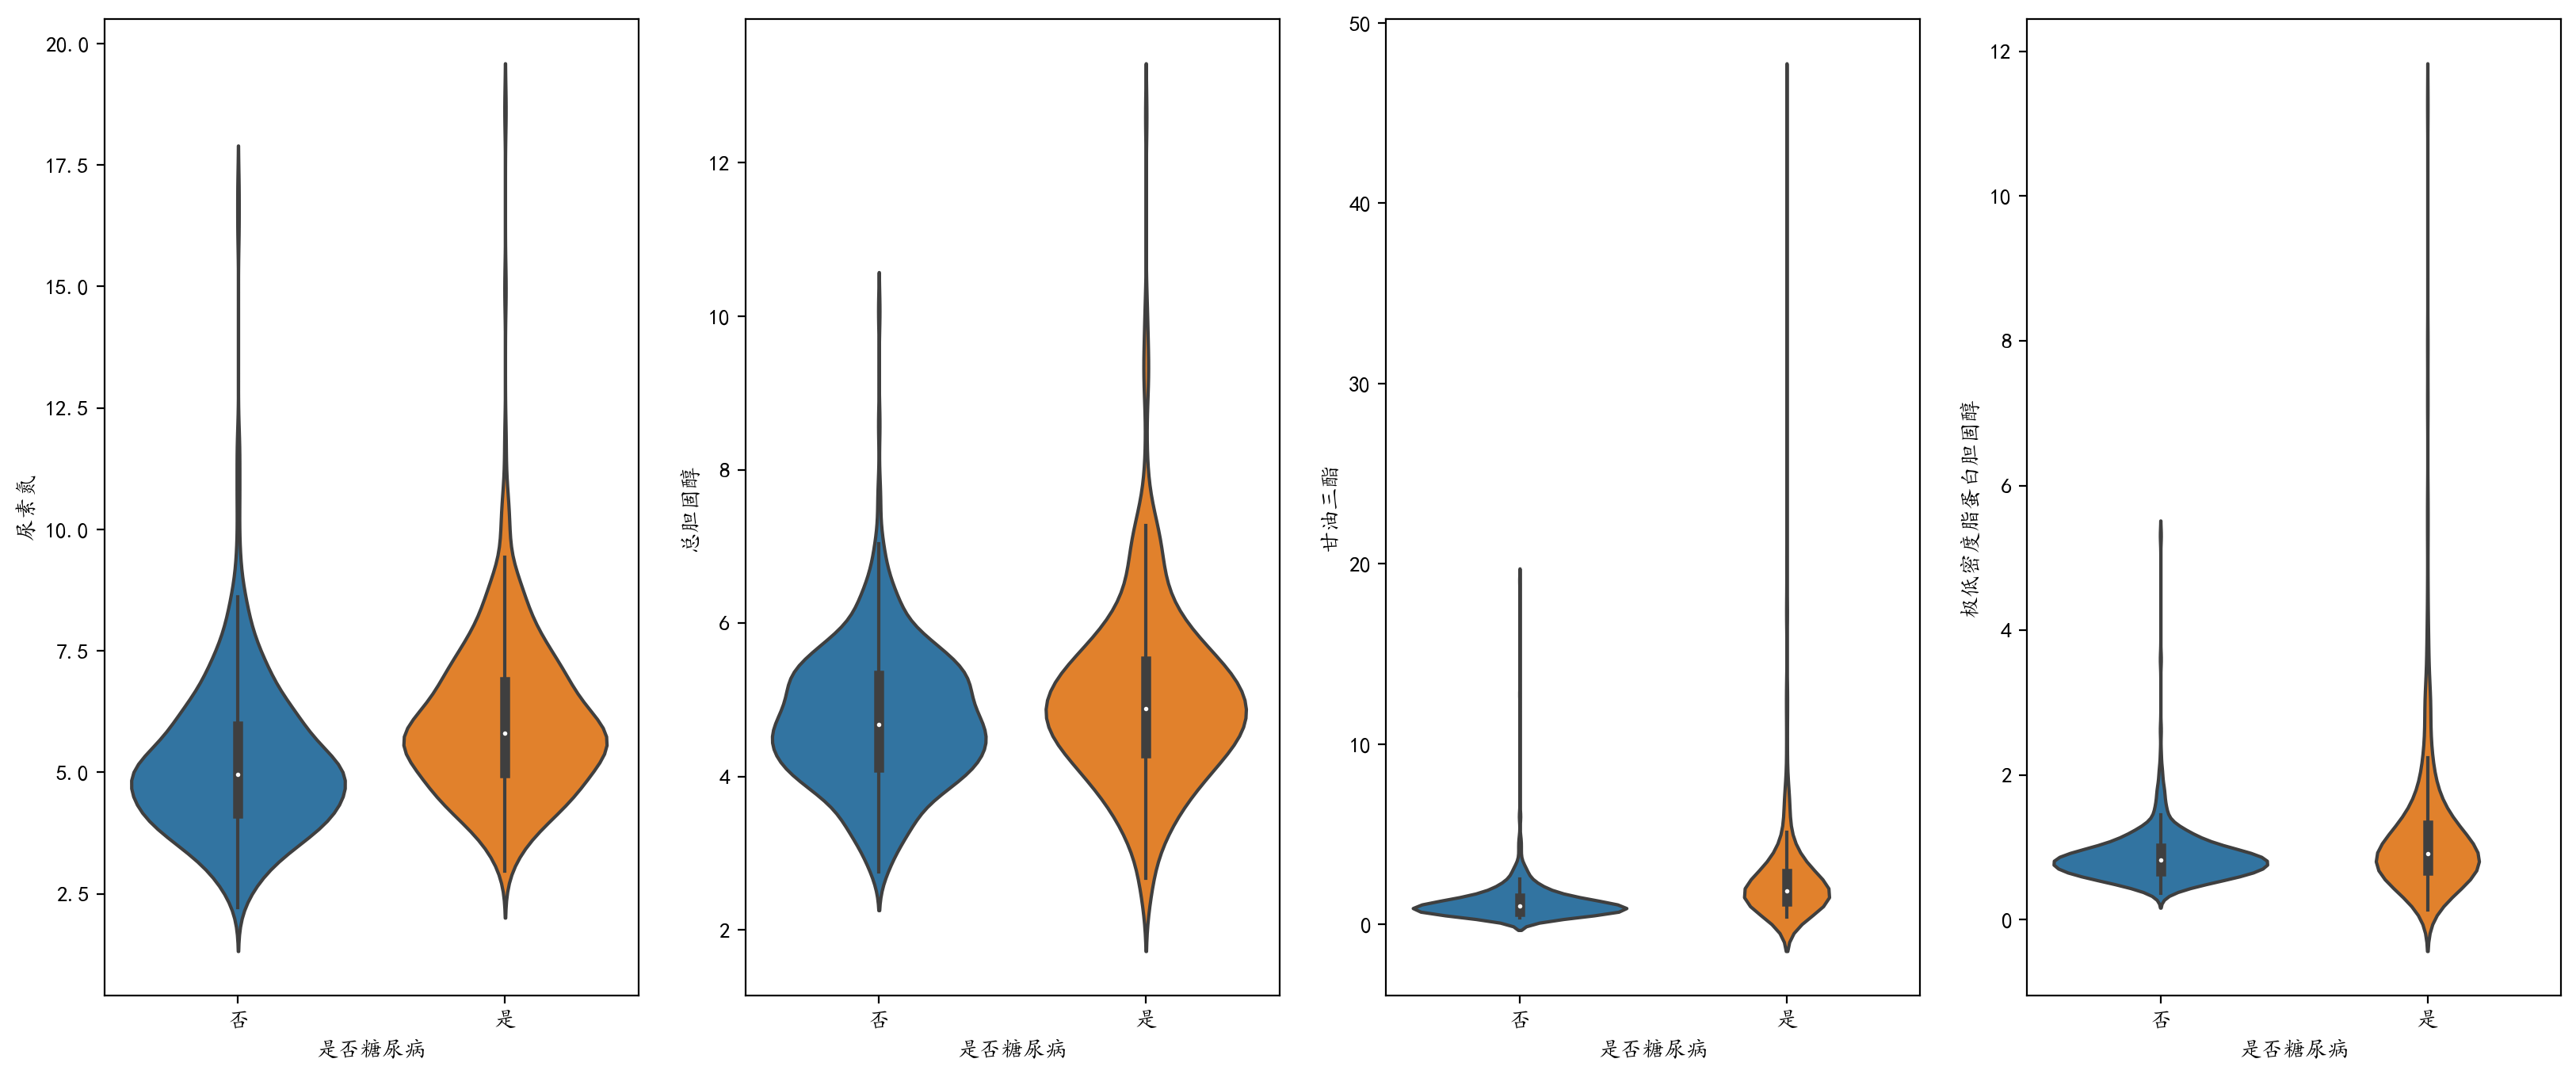

In [5]:

test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8),dpi=200)
for i in range(len(test_cols)):
    sns.violinplot(data=diabetes,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

In [6]:
#剔除离群点    分位数删除
for i in range(2):
    low=diabetes[test_cols[i]].quantile(0.25)
    high=diabetes[test_cols[i]].quantile(0.75)
    IQF=high-low
    valid_data=diabetes[(diabetes[test_cols[i]]<=high+1.5*IQF)&(diabetes[test_cols[i]]>=low-1.5*IQF)]


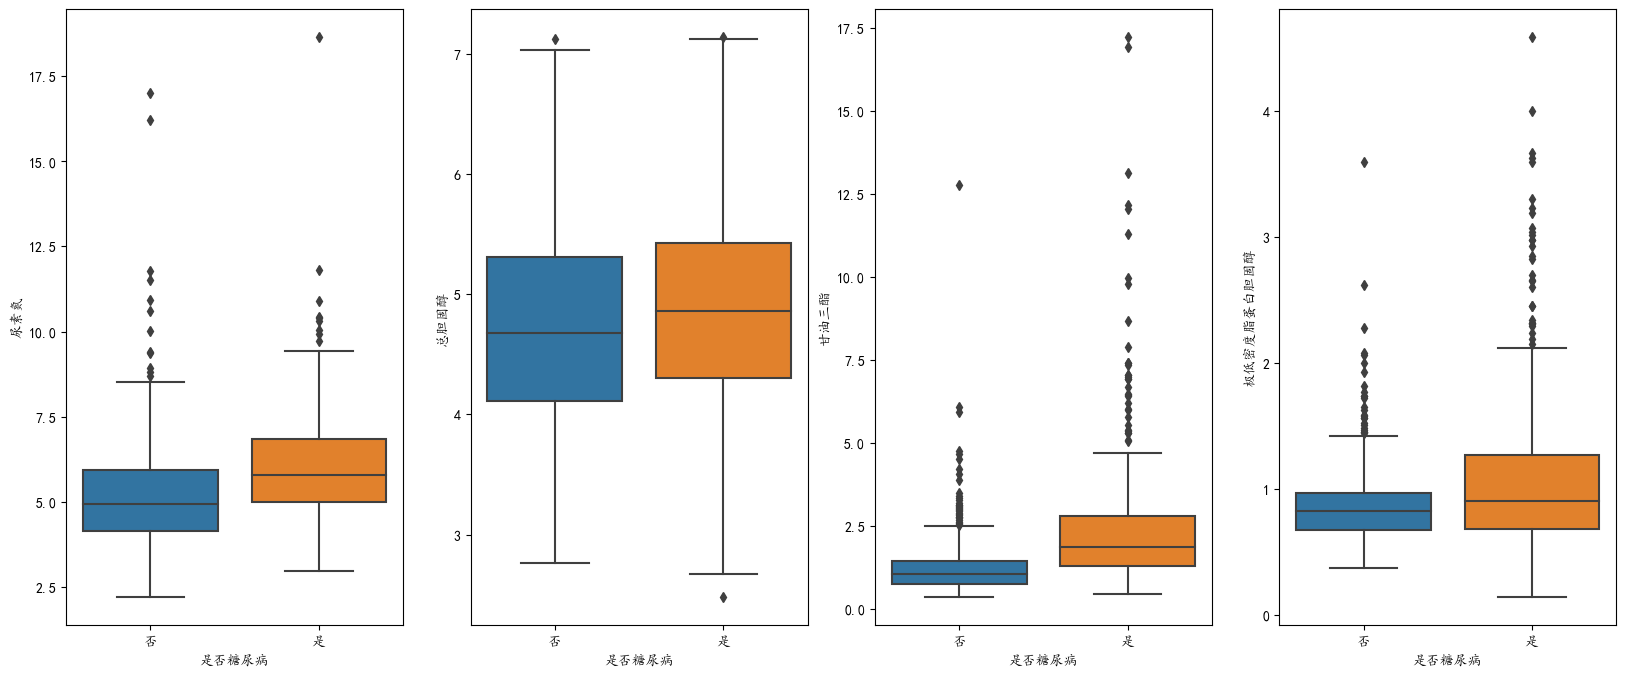

In [7]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8))
for i in range(len(test_cols)):
    sns.boxplot(data=valid_data,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()


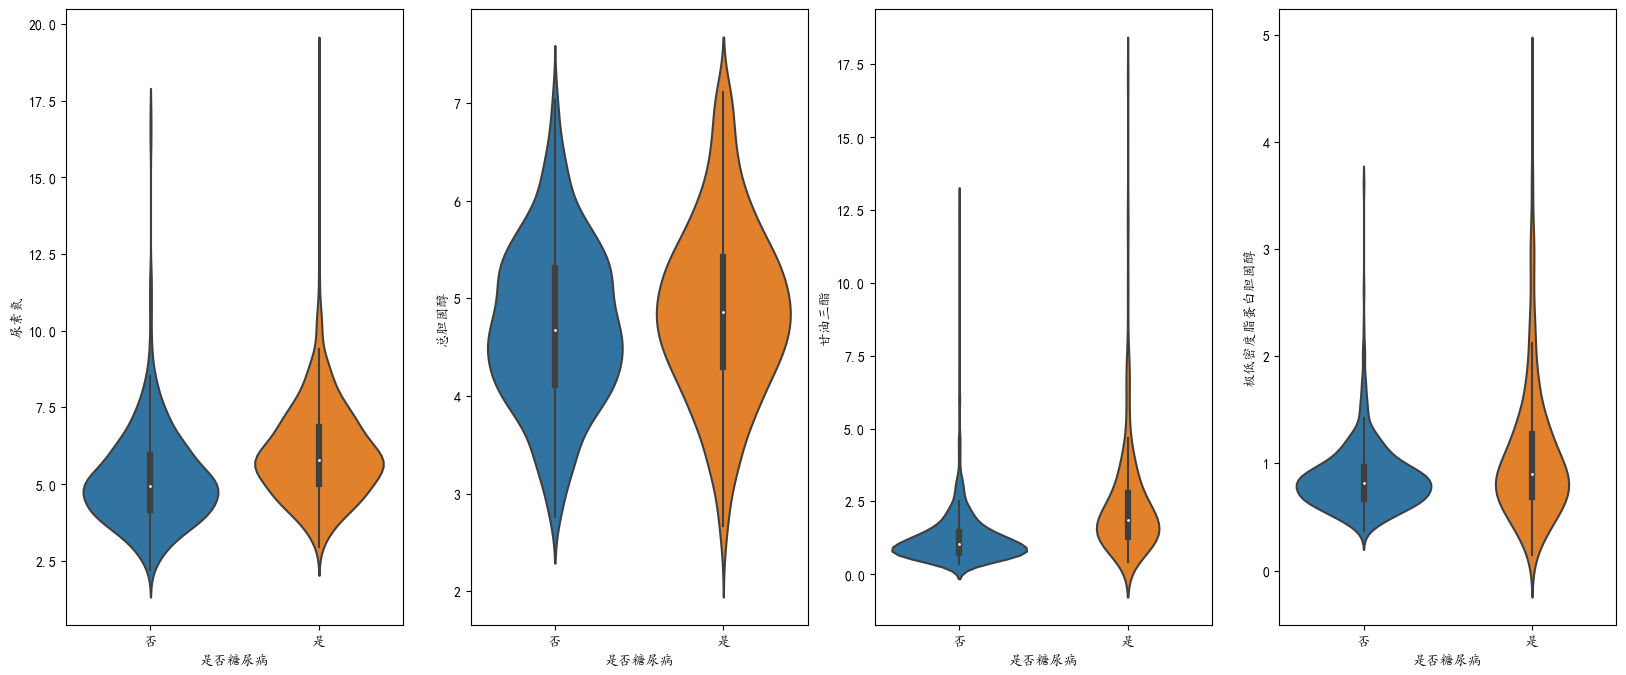

In [8]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8))
for i in range(len(test_cols)):
    sns.violinplot(data=valid_data,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

In [9]:
#剔除离群点     正太分布删除
for i in range(2):
    low=diabetes[test_cols[i]].quantile(0.01)
    high=diabetes[test_cols[i]].quantile(0.99)
    IQF=high-low
    valid_data2=diabetes[(diabetes[test_cols[i]]<=high)&(diabetes[test_cols[i]]>=low)]

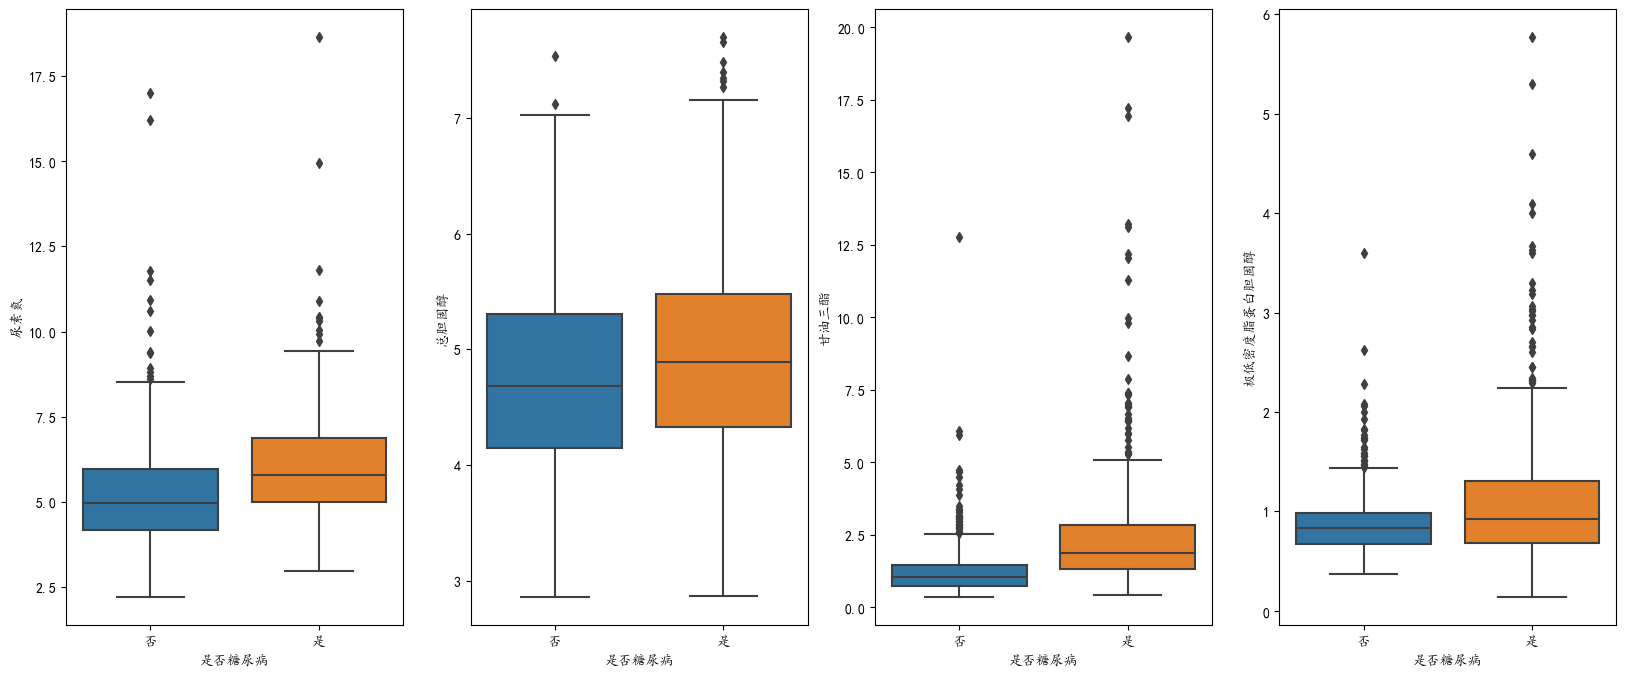

In [10]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8))
for i in range(len(test_cols)):
    sns.boxplot(data=valid_data2,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

由上述两个箱型图，我们选择用分位数删除异常值,对于甘油三酯和极低密度胆固醇我们采取box-cox变换

# box-cox变换

In [11]:
#数据量大用ks检验，数据小用sw检验
from scipy.stats import kstest
test_tat=kstest(valid_data['甘油三酯'],'norm')
test_tat#不服从正太分布

KstestResult(statistic=0.6660630279610343, pvalue=0.0)

In [12]:
test_tst=kstest(valid_data['极低密度脂蛋白胆固醇'],'norm')
test_tst#拒绝原假设，不服从正态分布

KstestResult(statistic=0.6302369479484985, pvalue=0.0)

In [13]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
valid_data['甘油三酯']=boxcox1p(valid_data['甘油三酯'],boxcox_normmax(valid_data['甘油三酯']+1))

In [14]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
valid_data['极低密度脂蛋白胆固醇']=boxcox1p(valid_data['极低密度脂蛋白胆固醇'],boxcox_normmax(valid_data['极低密度脂蛋白胆固醇']+1))

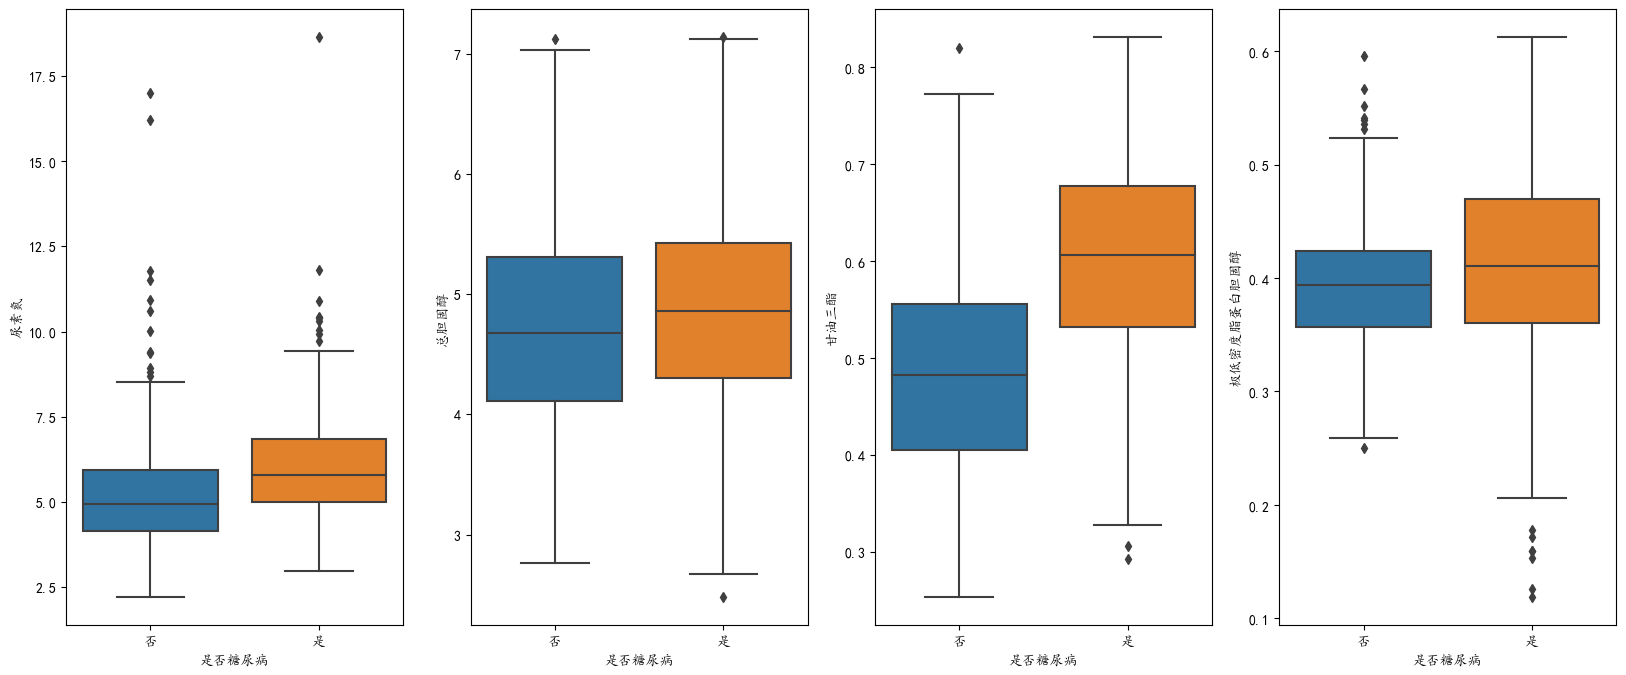

In [15]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8))
for i in range(len(test_cols)):
    sns.boxplot(data=valid_data,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

In [16]:
df=valid_data.copy()
df.drop('卡号',axis=1,inplace=True)
data_cleaning_suggestions(df)

NameError: name 'data_cleaning_suggestions' is not defined

In [17]:
Q1=df['尿素氮'].quantile(0.25)
Q2=df['尿素氮'].quantile(0.75)
area=Q2-Q1
true_data=df[(df['尿素氮']<=Q2+1.5*area)&(df['尿素氮']>=Q1-1.5*area)]


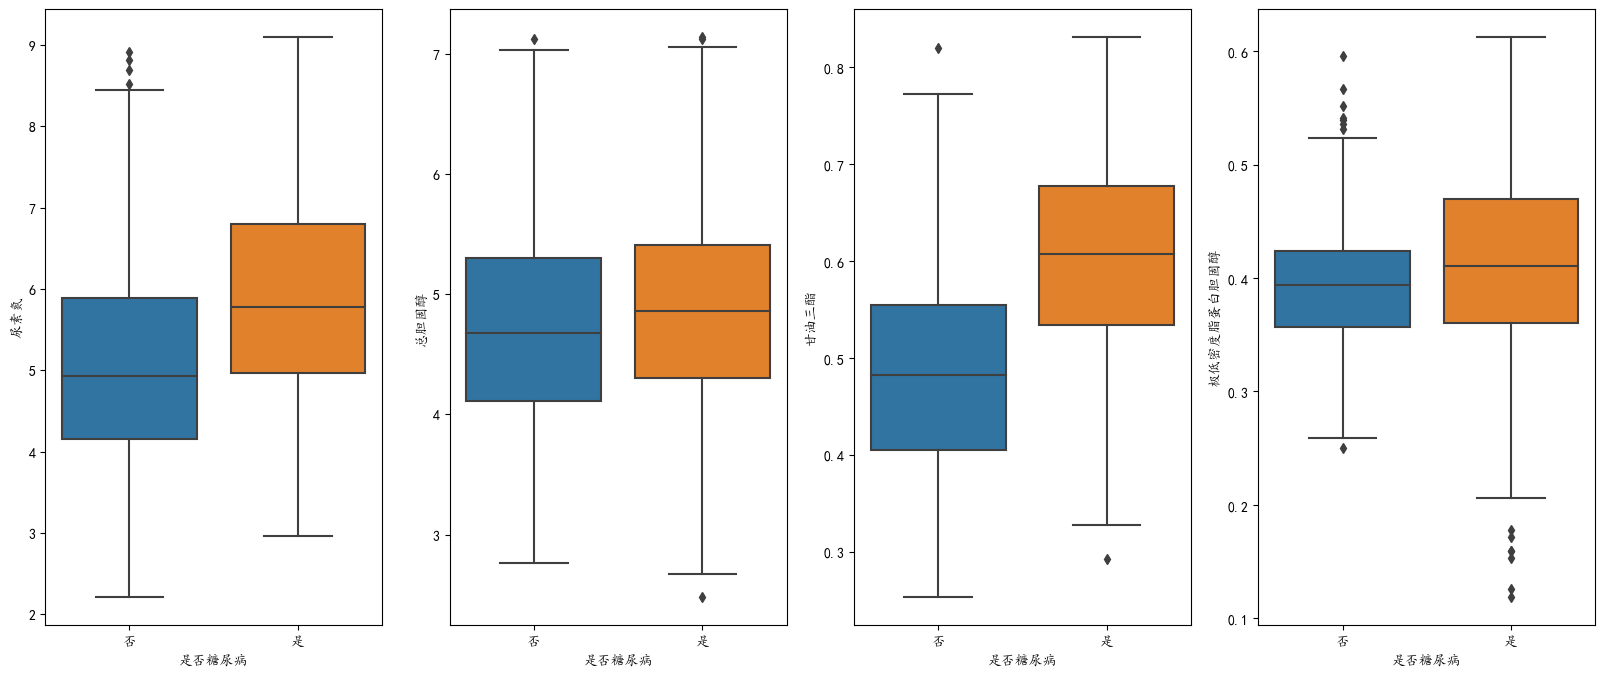

In [18]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8))
for i in range(len(test_cols)):
    sns.boxplot(data=true_data,x='是否糖尿病',y=test_cols[i],ax=axs[i])
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

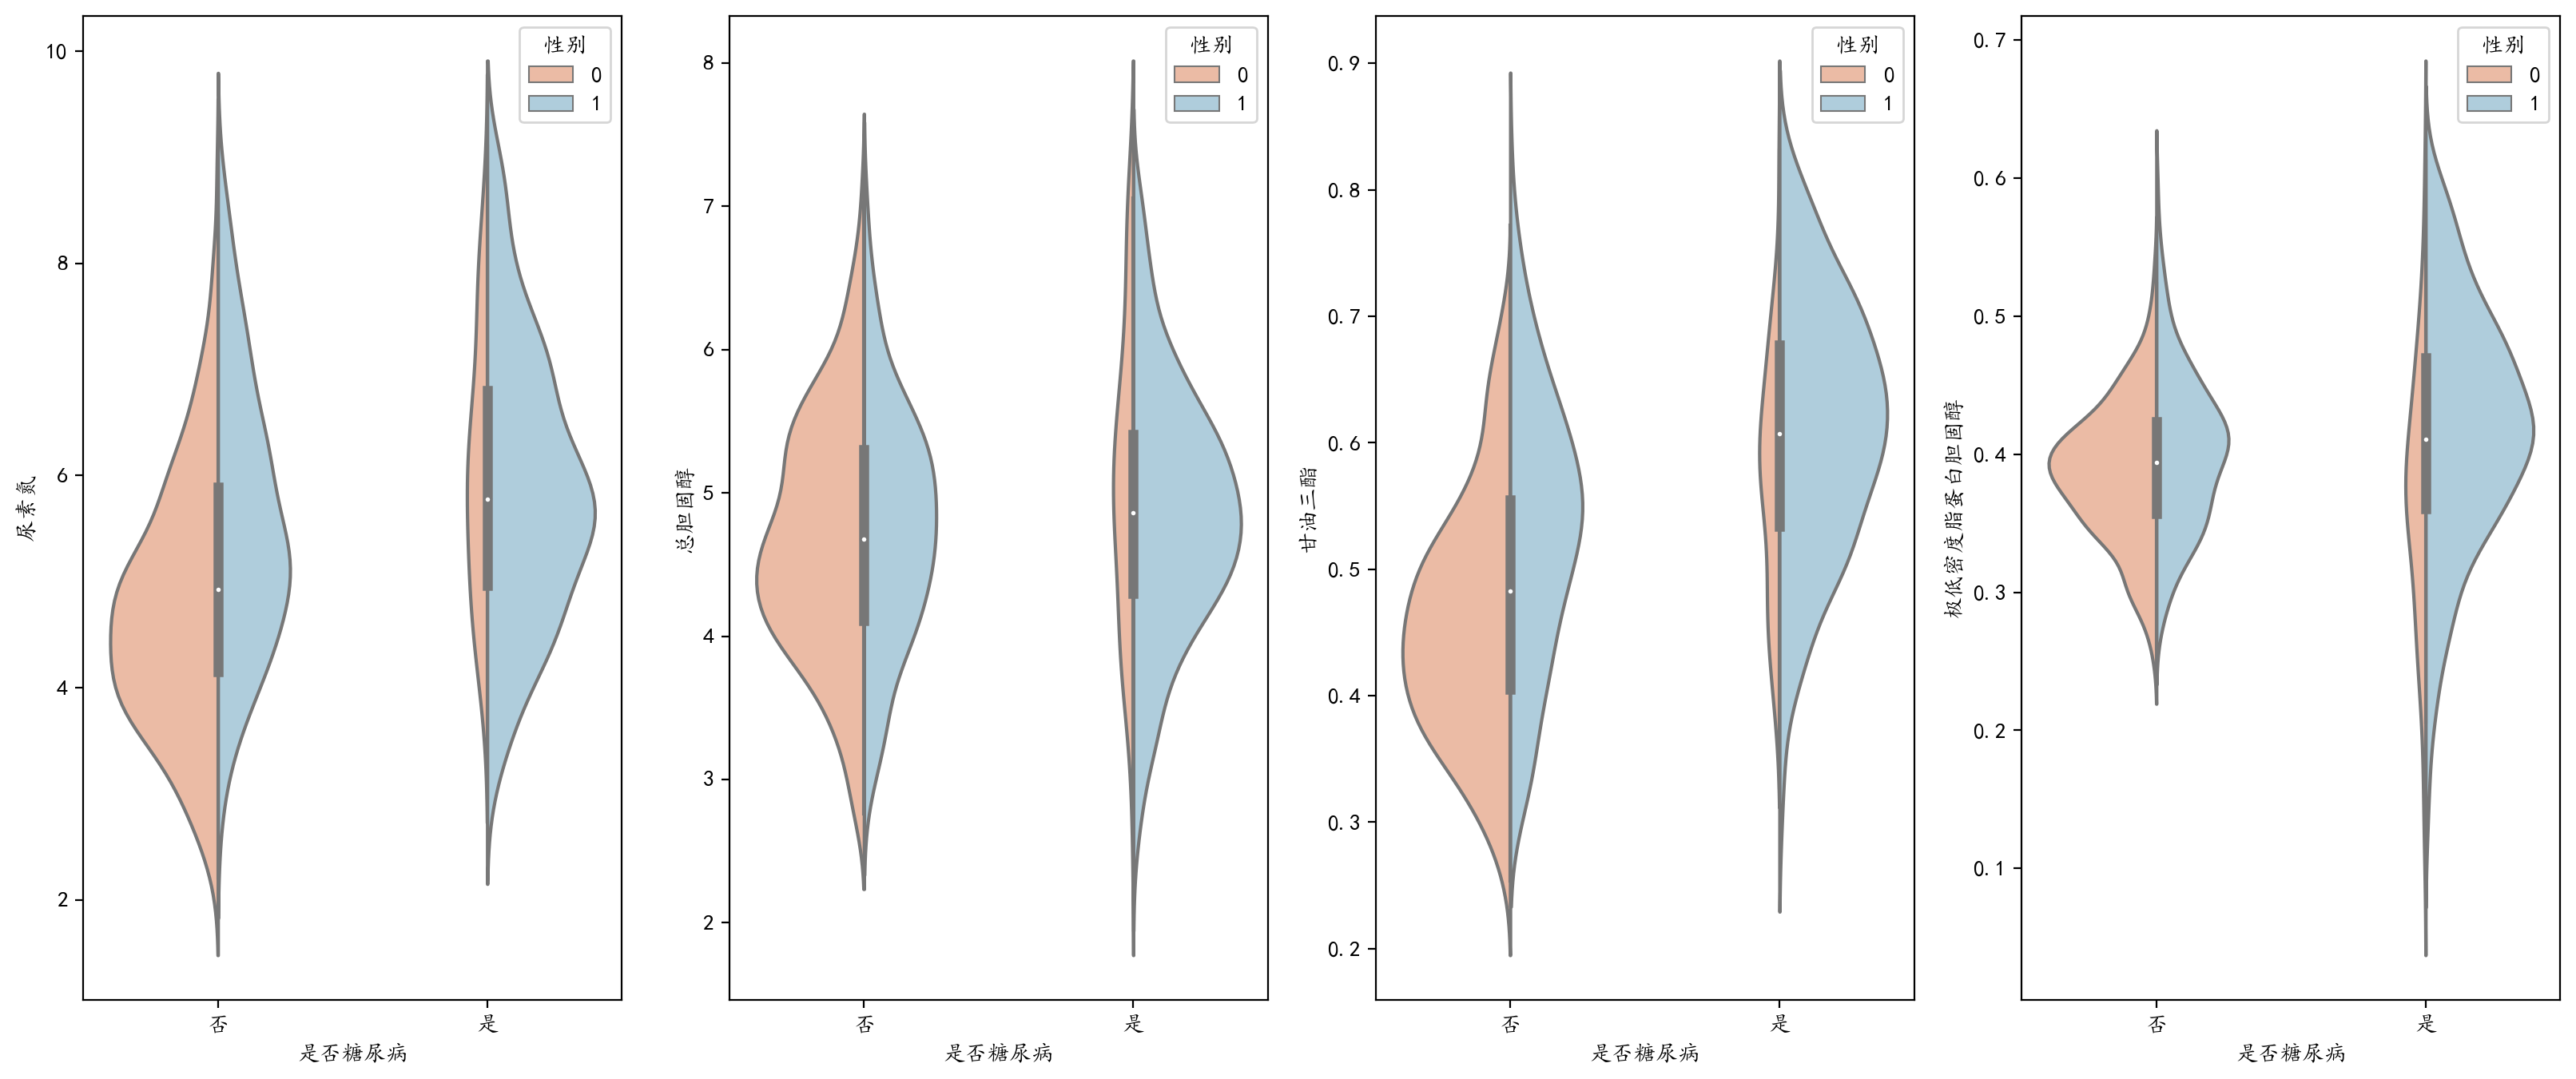

In [19]:
%matplotlib inline
test_cols=['尿素氮','总胆固醇','甘油三酯','极低密度脂蛋白胆固醇']
#diabetes.drop('卡号',axis=1,inplace=True)
fig,axs=plt.subplots(ncols=4,figsize=(20,8),dpi=200)
for i in range(len(test_cols)):
    sns.violinplot(data=true_data,x='是否糖尿病',y=test_cols[i],ax=axs[i],scale='count',hue='性别',split=True,palette='RdBu')
    axs[i].set_xticks([0,1],['否','是'])
plt.show()

至此，数据的离群点全部处理完毕，接下来是数据可视化分析

# 描述性统计

In [20]:
new_df=true_data.copy()
print(true_data.shape)



(964, 15)


In [21]:
new_df

,性别,年龄,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,极低密度脂蛋白胆固醇,甘油三酯,总胆固醇,脉搏,舒张压,高血压史,尿素氮,尿酸,肌酐,体重检查结果,是否糖尿病
0,0,38,1.25,2.99,0.441220,0.376246,5.31,83,83,0,4.99,243.3,50,1,0
1,0,31,1.15,1.99,0.398311,0.323332,3.98,85,63,0,4.72,391.0,47,1,0
2,0,27,1.29,2.21,0.362220,0.362148,4.19,73,61,0,5.87,325.7,51,1,0
3,0,33,0.93,2.01,0.354009,0.436861,3.60,83,60,0,2.40,203.2,40,2,0
4,0,36,1.17,2.83,0.396134,0.405398,4.83,85,67,0,4.09,236.8,43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0,68,1.29,1.91,0.336416,0.578306,3.80,81,81,0,7.80,363.1,73,2,1
1001,1,86,1.58,3.81,0.447498,0.585663,6.50,92,73,0,8.60,406.2,93,1,1
1003,1,67,1.30,2.90,0.398311,0.578306,5.04,103,75,0,4.70,393.6,98,3,1
1004,0,46,1.21,2.31,0.356787,0.540120,4.19,78,84,0,3.80,219.2,51,2,1


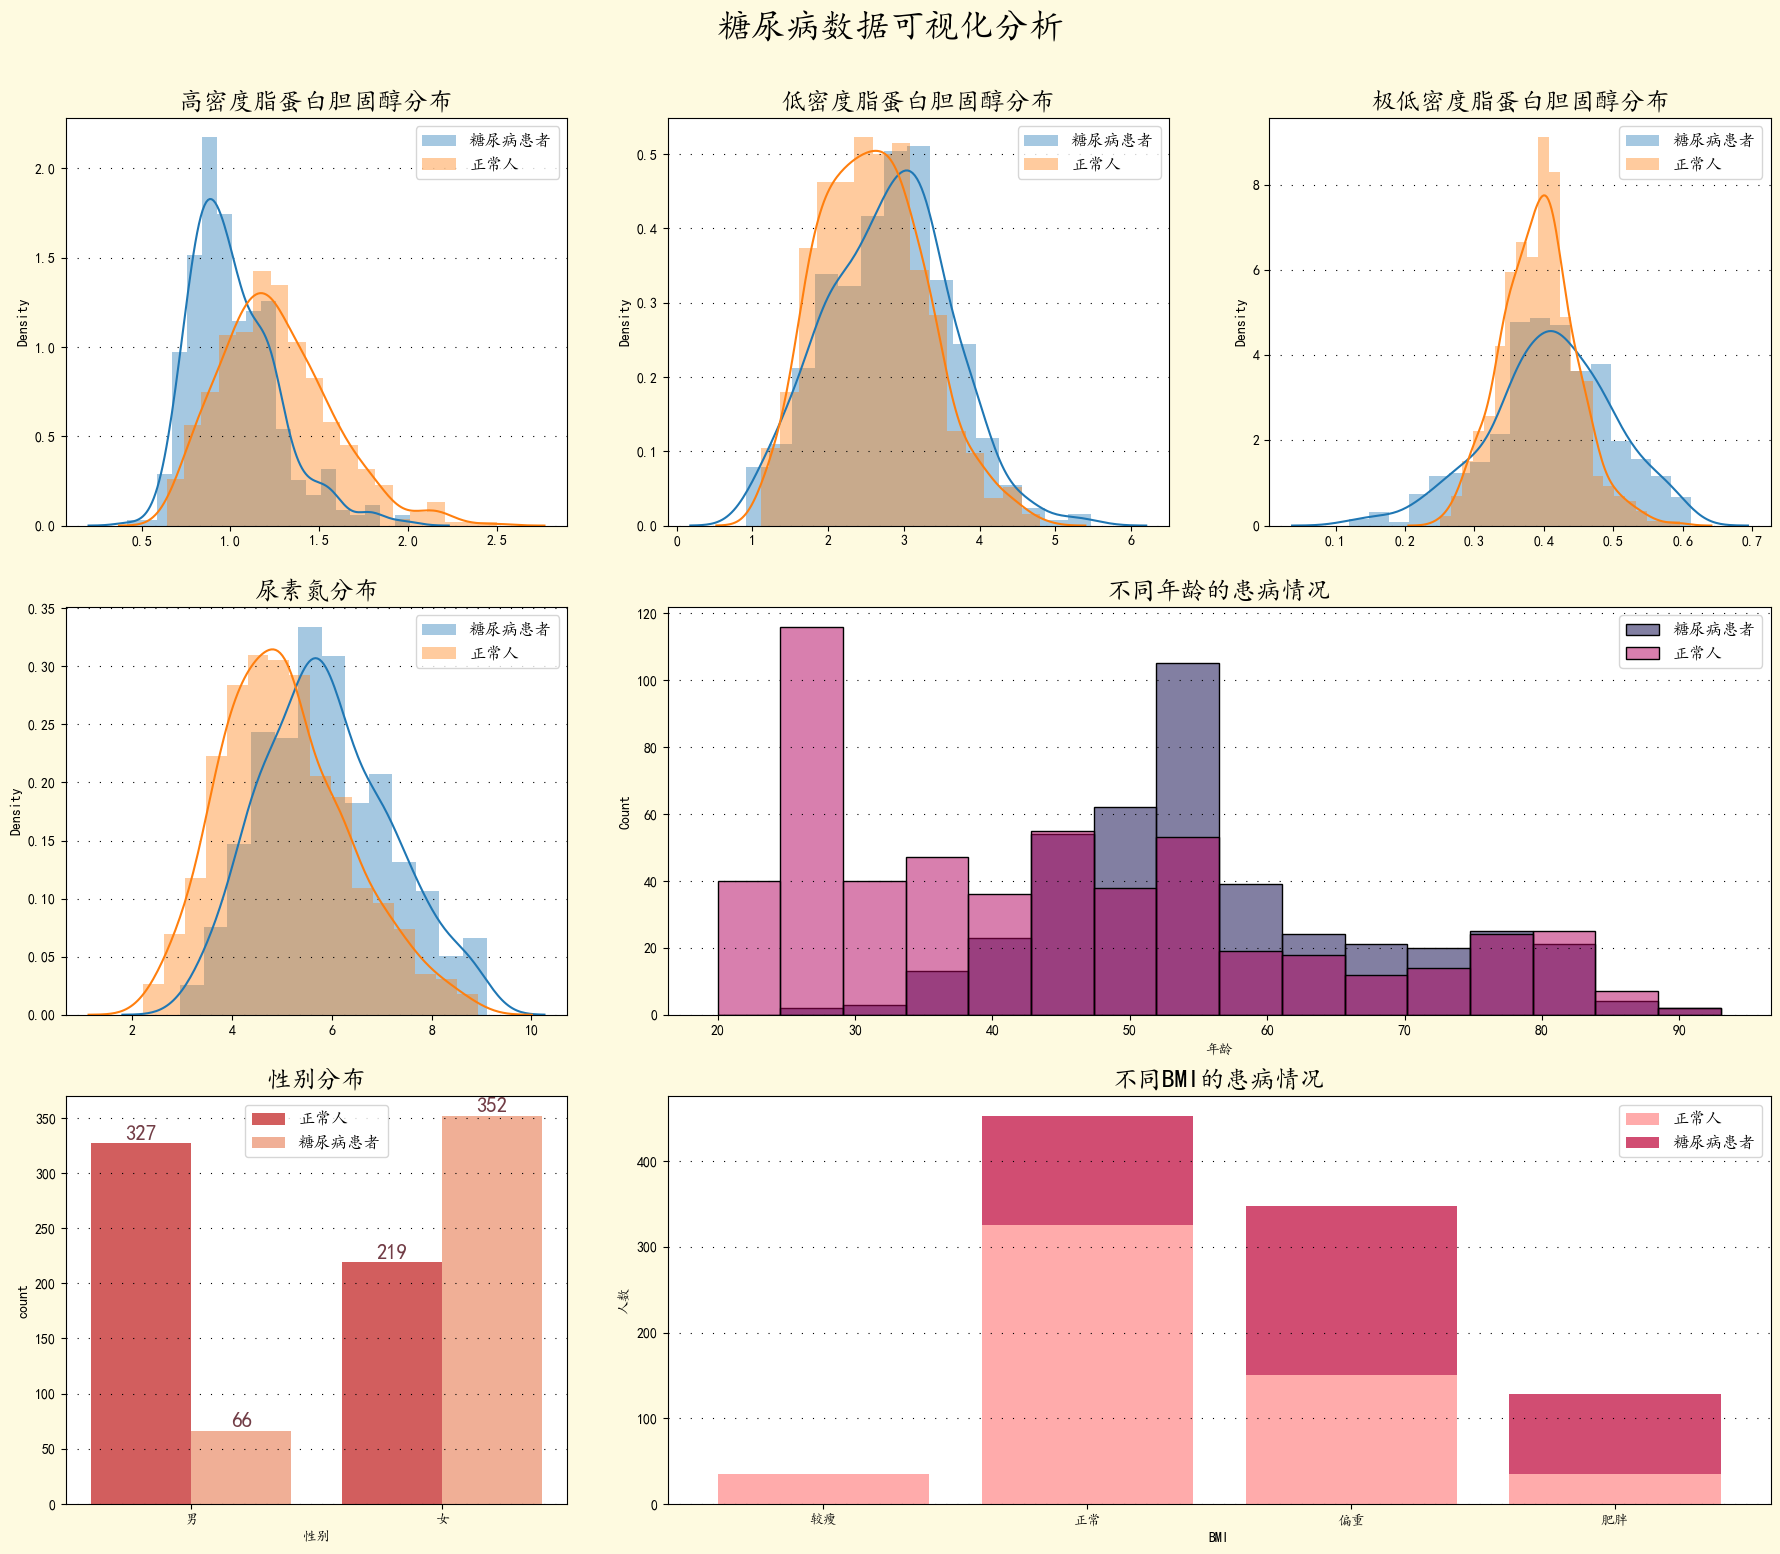

In [22]:
fig=plt.figure(figsize=(22,18))
gs=fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1:])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1:])

#画布设置
fig.suptitle(t='糖尿病数据可视化分析',y=0.94, fontweight ="800",fontsize=25)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

#高密度酯蛋白固醇
ax1.set_title('高密度脂蛋白胆固醇分布',fontweight='600',fontsize=18)
sns.distplot(x=new_df[new_df['是否糖尿病']==1]['高密度脂蛋白胆固醇'],hist=True,ax=ax1,label='糖尿病患者')
sns.distplot(x=new_df[new_df['是否糖尿病']==0]['高密度脂蛋白胆固醇'],hist=True,ax=ax1,label='正常人')
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax1.legend(loc='best',fontsize=12)

#低密度脂蛋白胆固醇
ax2.set_title('低密度脂蛋白胆固醇分布',fontweight='bold',fontsize=18)
sns.distplot(x=new_df[new_df['是否糖尿病']==1]['低密度脂蛋白胆固醇'],hist=True,ax=ax2,label='糖尿病患者')
sns.distplot(x=new_df[new_df['是否糖尿病']==0]['低密度脂蛋白胆固醇'],hist=True,ax=ax2,label='正常人')
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax2.legend(loc='best',fontsize=12)

#极低密度脂蛋白胆固醇	
ax3.set_title('极低密度脂蛋白胆固醇分布',fontweight='bold',fontsize=18)
sns.distplot(x=new_df[new_df['是否糖尿病']==1]['极低密度脂蛋白胆固醇'],hist=True,ax=ax3,label='糖尿病患者')
sns.distplot(x=new_df[new_df['是否糖尿病']==0]['极低密度脂蛋白胆固醇'],hist=True,ax=ax3,label='正常人')
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax3.legend(loc='best',fontsize=12)

#尿素氮
ax4.set_title('尿素氮分布',fontweight='bold',fontsize=18)
sns.distplot(x=new_df[new_df['是否糖尿病']==1]['尿素氮'],hist=True,ax=ax4,label='糖尿病患者')
sns.distplot(x=new_df[new_df['是否糖尿病']==0]['尿素氮'],hist=True,ax=ax4,label='正常人')
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax4.legend(loc='best',fontsize=12)

#性别
ax7.set_title('性别分布',fontweight='bold',fontsize=18)

sns.countplot(data=new_df,x='性别',ax=ax7,hue='是否糖尿病',palette=['#E54B4B','#FFA987'])
ax7.set_xticks([0,1],['男','女'])
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax7.text(-0.20,330,327,ha='center',color='#723D46',fontsize=15)
ax7.text(0.2,70,66,ha='center',color='#723D46',fontsize=15)
ax7.text(0.8,222,219,ha='center',color='#723D46',fontsize=15)
ax7.text(1.2,355,352,ha='center',color='#723D46',fontsize=15)
ax7.legend(loc='best',fontsize=12,labels=['正常人','糖尿病患者'])

#年龄分布
age_bins=[20,30,40,50,60,70,80,90]
age=pd.cut(new_df['年龄'],age_bins)
color=['#B3005E','#060047']
sns.histplot(data=new_df,x='年龄',hue='是否糖尿病',palette=color,ax=ax5)
ax5.set_title('不同年龄的患病情况',fontweight='bold', fontsize=18)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax5.legend(loc='best',fontsize=12,labels=['糖尿病患者','正常人'])


#不同BMI的患病情况
ax8.set_title('不同BMI的患病情况',fontweight='bold',fontsize=18)
x=['较瘦','正常','偏重','肥胖']
y_0=[35,325,151,35]
y_1=[0,128,197,93]
plt.bar(x,y_0,color='#FFABAB',label='正常人')
plt.bar(x,y_1,bottom=y_0,color='#D14D72',label='糖尿病患者')
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
ax8.legend(loc='best',fontsize=12)
ax8.set_xlabel('BMI')
ax8.set_ylabel('人数',rotation=90)
plt.savefig('描述性统计')

# 特征工程

选择数据集A和数据集B，先对特征工程进行解释，使用不同的方法进行特征选择

In [23]:
df1=new_df.copy()
# df1.drop('是否糖尿病',axis=1,inplace=True)
corr_matrix=df1.corr('spearman')
# corr_matrix=pd.array(corr_matrix)
corr_matrix.reset_index(drop=True)


,性别,年龄,高密度脂蛋白胆固醇,低密度脂蛋白胆固醇,极低密度脂蛋白胆固醇,甘油三酯,总胆固醇,脉搏,舒张压,高血压史,尿素氮,尿酸,肌酐,体重检查结果,是否糖尿病
0,1.000000,0.169461,-0.516551,0.132324,0.206813,0.441131,0.054470,0.031849,0.400832,0.066626,0.302124,0.480617,0.666308,0.353389,0.444749
1,0.169461,1.000000,-0.096161,0.212287,0.072829,0.321571,0.188028,0.122885,0.296085,0.360874,0.359190,0.198702,0.298652,0.190413,0.378433
2,-0.516551,-0.096161,1.000000,0.049059,-0.263351,-0.547182,0.190599,-0.064955,-0.285463,-0.085186,-0.134580,-0.379756,-0.313022,-0.371101,-0.396118
3,0.132324,0.212287,0.049059,1.000000,0.005675,0.227654,0.815261,0.095961,0.196703,0.100628,0.082374,0.125641,0.103069,0.145812,0.134407
4,0.206813,0.072829,-0.263351,0.005675,1.000000,0.644229,0.380570,0.105104,0.221010,0.000660,0.147664,0.220236,0.159121,0.147048,0.138417
5,0.441131,0.321571,-0.547182,0.227654,0.644229,1.000000,0.359901,0.183794,0.448719,0.144687,0.238370,0.455987,0.323681,0.454437,0.493247
6,0.054470,0.188028,0.190599,0.815261,0.380570,0.359901,1.000000,0.122096,0.188471,0.071068,0.107257,0.093930,0.047373,0.110170,0.095631
7,0.031849,0.122885,-0.064955,0.095961,0.105104,0.183794,0.122096,1.000000,0.290463,0.114735,0.041332,0.028790,-0.054251,0.078338,0.227526
8,0.400832,0.296085,-0.285463,0.196703,0.221010,0.448719,0.188471,0.290463,1.000000,0.276976,0.245076,0.331105,0.284723,0.354761,0.434610
9,0.066626,0.360874,-0.085186,0.100628,0.000660,0.144687,0.071068,0.114735,0.276976,1.000000,0.168169,0.177028,0.154729,0.189416,0.199928


<AxesSubplot:>

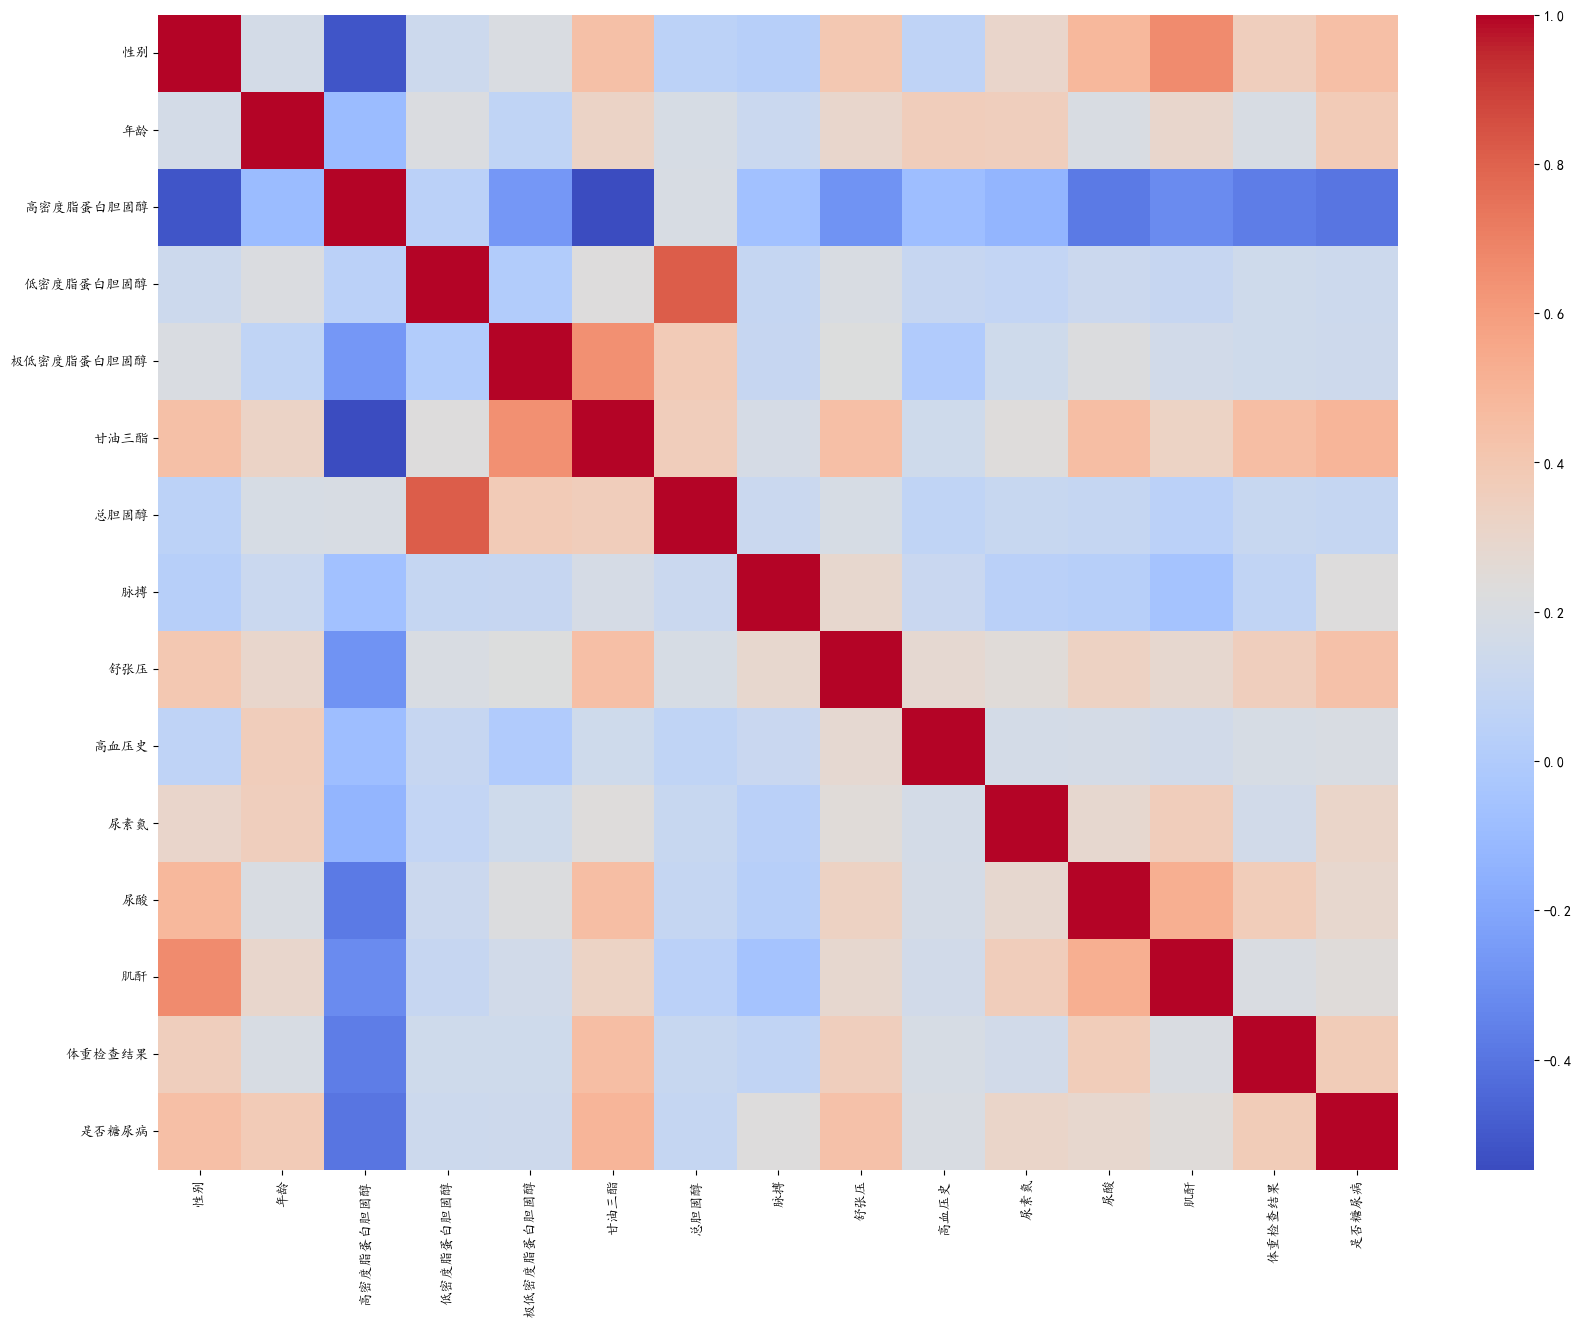

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(pd.DataFrame(corr_matrix),annot=False,cmap='coolwarm')

# Shap特征选择

In [25]:
import shap
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [26]:
Tree=RandomForestRegressor(n_estimators=100,random_state=456)
Tree.fit(x,y)

RandomForestRegressor(random_state=456)

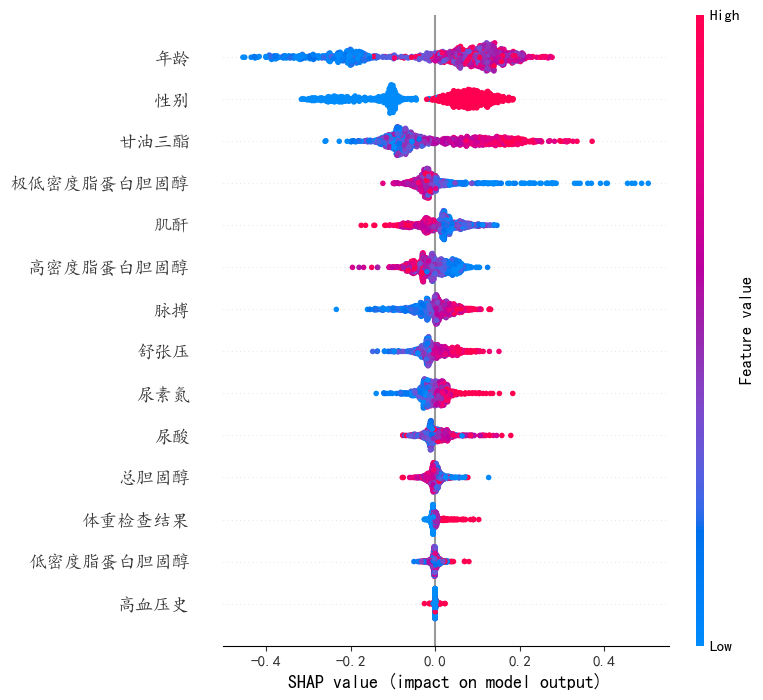

In [27]:
cols=new_df.columns
cols=cols.drop('是否糖尿病')
explainer=shap.TreeExplainer(Tree)
shap_values=explainer.shap_values(new_df[cols])

shap.summary_plot(shap_values, new_df[cols])


In [28]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[924], new_df[cols].iloc[1])

In [29]:
shap.force_plot(explainer.expected_value, shap_values[456], new_df[cols].iloc[1])

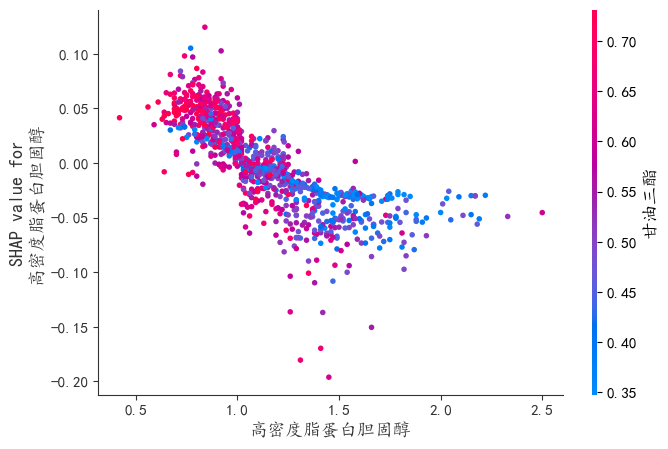

In [30]:
shap.dependence_plot('高密度脂蛋白胆固醇',shap_values,new_df[cols],show=False)

In [31]:
X=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
x_train.shape


(771, 14)

0.7976878612716762
0.42283317737877046
0.9011031017911753


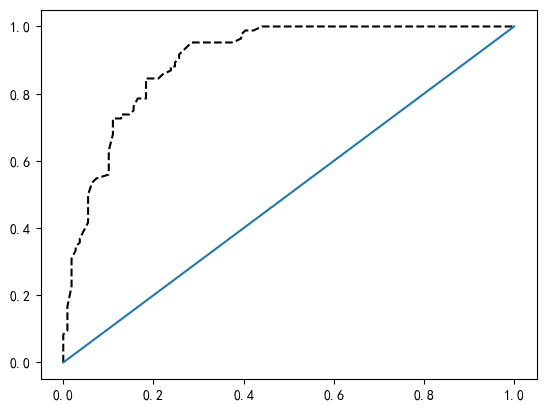

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.78      0.82      0.80        84

    accuracy                           0.82       193
   macro avg       0.82      0.82      0.82       193
weighted avg       0.82      0.82      0.82       193



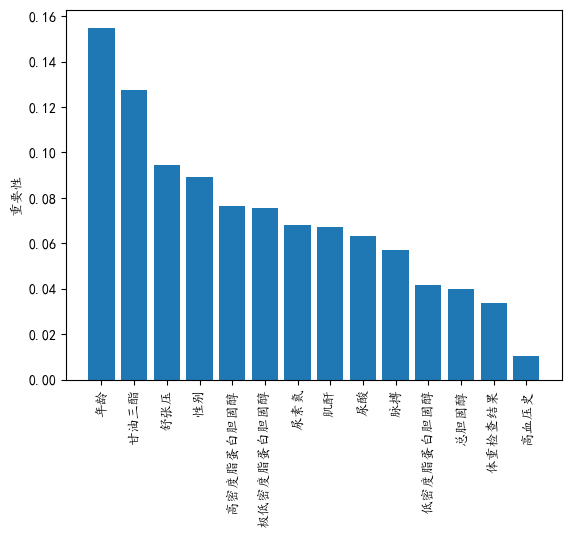

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)
y_score=rf_clf.predict_proba(x_test)[:,1]
print(f1_score(y_test,y_pred))
result_scores=cross_val_score(rf_clf,X,y,cv=10,scoring='neg_mean_squared_error')
print(np.sqrt(-result_scores).mean())
print(roc_auc_score(y_test,y_score))
fpr,tpr,thresholds=roc_curve(y_test,y_score)
plt.plot(fpr,tpr,'k--')
plt.plot([0,1],[0,1])
plt.show()
importance=rf_clf.feature_importances_
imp_result = np.argsort(importance)[::-1][:]

features=[]
feat_scores=[]
#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    features.append(new_df.columns[imp_result[i]])
    feat_scores.append(importance[imp_result[i]])

importance_bar=pd.DataFrame(data=np.c_[features,feat_scores],columns=['features','scores'])
plt.bar(range(len(features)),feat_scores)
plt.xticks(range(len(features)),features,rotation=90)
plt.ylabel('重要性')
print(classification_report(y_test,y_pred))

结果与shapvalues一致，可以认为结果得到验证

In [34]:
X1=X.drop(['总胆固醇','体重检查结果','低密度脂蛋白胆固醇','高血压史'],axis=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.1,stratify=y,random_state=42)

In [36]:
rf_clf2=RandomForestClassifier(random_state=42)

In [37]:
rf_clf2.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

0.8
0.44252606814874723
0.895887445887446


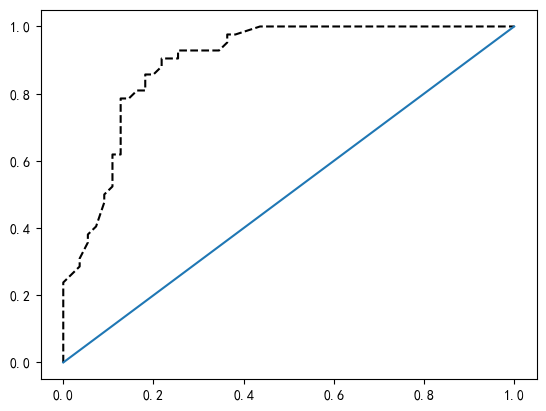

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        55
           1       0.79      0.81      0.80        42

    accuracy                           0.82        97
   macro avg       0.82      0.82      0.82        97
weighted avg       0.83      0.82      0.82        97

precision score 0.7906976744186046


In [38]:
y_pred=rf_clf2.predict(x_test)
print(f1_score(y_test,y_pred))
result_scores=cross_val_score(rf_clf,X1,y,cv=10,scoring='neg_mean_squared_error')
y1_score=rf_clf2.predict_proba(x_test)[:,1]
print(np.sqrt(-result_scores).mean())
print(roc_auc_score(y_test,y1_score))
fpr,tpr,thresholds=roc_curve(y_test,y1_score)
plt.plot(fpr,tpr,'k--')
plt.plot([0,1],[0,1])
plt.show()
# importance=rf_clf2.feature_importances_
# imp_result = np.argsort(importance)[::-1][:]
 
# #按重要性从高到低输出属性列名和其重要性
# for i in range(len(imp_result)):
#     print("%2d. %-*s %f" % (i + 1, 30, new_df.columns[imp_result[i]], importance[imp_result[i]]))
print(classification_report(y_test,y_pred))
print('precision score',precision_score(y_test,y_pred))

上述结果验证了为什么特征工程的有效性

# 先不进行调参，使用交叉验证

# logistic回归


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
log_reg=LogisticRegression()
sss=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in sss.split(x_train,y_train):
    X_val_train,X_val=x_train.iloc[train_index],x_train.iloc[test_index]
    y_val_train,y_val=y_train.iloc[train_index],y_train.iloc[test_index]


In [40]:
X_val_train.shape,X_val.shape

((694, 10), (173, 10))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        98
           1       0.74      0.85      0.79        75

    accuracy                           0.80       173
   macro avg       0.80      0.81      0.80       173
weighted avg       0.81      0.80      0.80       173

Precision score 0.735632183908046
f1 score 0.7901234567901233
recall score 0.8533333333333334
accuracy score 0.8034682080924855
roc auc score 0.8795918367346939


Text(0.5, 1.0, 'logsitics regression')

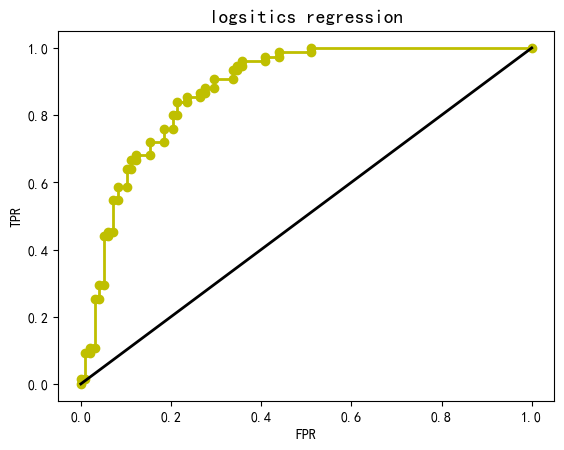

In [41]:
from sklearn.metrics import accuracy_score
log_reg.fit(X_val_train,y_val_train)
y_log_pred=log_reg.predict(X_val)
y_predict_prob=log_reg.predict_proba(X_val)
fpr,tpr,thresholds=roc_curve(y_val,y_predict_prob[:,1])
print(classification_report(y_val,y_log_pred))
print('Precision score',precision_score(y_val,y_log_pred))
print('f1 score',f1_score(y_val,y_log_pred))
print('recall score',recall_score(y_val,y_log_pred))
print('accuracy score',accuracy_score(y_val,y_log_pred))
print('roc auc score',roc_auc_score(y_val,y_predict_prob[:,1]))
plt.plot(fpr,tpr,'o-',color='y',linewidth=2)
plt.plot([0,1],[0,1],'k-',color='k',linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('logsitics regression',fontsize=14,fontweight='bold')

In [42]:
y_test_o_log=log_reg.predict(x_test)
accuracy_score(y_test,y_test_o_log)

0.7422680412371134

# SVM

precision score 0.7272727272727273
recall score 0.7466666666666667
f1_score 0.7368421052631579
accuracy score 0.7687861271676301
roc_auc_score 0.827891156462585
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        98
           1       0.73      0.75      0.74        75

    accuracy                           0.77       173
   macro avg       0.76      0.77      0.77       173
weighted avg       0.77      0.77      0.77       173



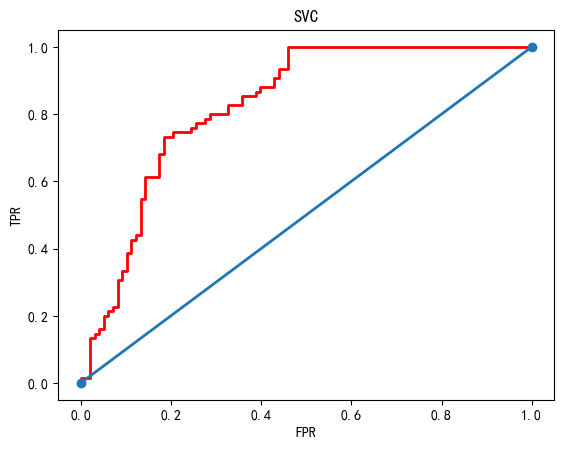

In [43]:
from sklearn.svm import SVC
svc_clf=SVC(probability=True,random_state=42)

svc_clf.fit(X_val_train,y_val_train)

y_svc_pred=svc_clf.predict(X_val)
y_svc_prob=svc_clf.predict_proba(X_val)
fpr,tpr,threshold=roc_curve(y_val,y_svc_prob[:,1])
print('precision score',precision_score(y_val,y_svc_pred))
print('recall score',recall_score(y_val,y_svc_pred))
print('f1_score',f1_score(y_val,y_svc_pred))
print('accuracy score',accuracy_score(y_val,y_svc_pred))
print('roc_auc_score',roc_auc_score(y_val,y_svc_prob[:,1]))
print(classification_report(y_val,y_svc_pred))
plt.plot(fpr,tpr,'k-',color='r',linewidth=2)
plt.plot([0,1],[0,1],'o-',linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVC')
plt.show()

In [44]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimators,X,y, cv=None,n_jobs=1,train_size=np.linspace(0.1,1,10)):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(24,10),dpi=120,sharey=True)
    train_sizes,train_score,test_score=learning_curve(estimators[0],X,y,cv=cv,n_jobs=n_jobs, train_sizes=train_size)
    train_score_mean=np.mean(train_score,axis=1)
    train_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    ax1.plot(train_sizes,train_score_mean,'o-',color='#ff9124',label='Training score')
    ax1.plot(train_sizes,test_score_mean,'o-',color='#2492ff',label='Test score')
    ax1.set_title('{}'.format(estimators[0]))
    ax1.legend()
    
    train_sizes,train_score,test_score=learning_curve(estimators[1],X,y,cv=cv,n_jobs=n_jobs, train_sizes=train_size)
    train_score_mean=np.mean(train_score,axis=1)
    train_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    ax2.plot(train_sizes,train_score_mean,'o-',color='#ff9124',label='Training score')
    ax2.plot(train_sizes,test_score_mean,'o-',color='#2492ff',label='Test score')
    ax2.legend()
    ax2.set_title('{}'.format(estimators[1]))
    
    train_sizes,train_score,test_score=learning_curve(estimators[2],X,y,cv=cv,n_jobs=n_jobs, train_sizes=train_size)
    train_score_mean=np.mean(train_score,axis=1)
    train_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    ax3.plot(train_sizes,train_score_mean,'o-',color='#ff9124',label='Training score')
    ax3.plot(train_sizes,test_score_mean,'o-',color='#2492ff',label='Test score')
    ax3.legend()
    
    
    
    train_sizes,train_score,test_score=learning_curve(estimators[3],X,y,cv=cv,n_jobs=n_jobs, train_sizes=train_size)
    train_score_mean=np.mean(train_score,axis=1)
    train_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    ax4.plot(train_sizes,train_score_mean,'o-',color='#ff9124',label='Training score')
    ax4.plot(train_sizes,test_score_mean,'o-',color='#2492ff',label='Test score')
    ax4.legend()
    ax4.set_title('XGBoost')

XGBoost 和随机森林严重过拟合，不能选择

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec_clf=DecisionTreeClassifier()
dec_clf.fit(X_val_train,y_val_train)
y_tree_pred=dec_clf.predict(X_val)
print(classification_report(y_val,y_tree_pred))
print('accuracy_score',accuracy_score(y_val,y_tree_pred))
print('precision_score',precision_score(y_val,y_tree_pred))
print('recall_score',recall_score(y_val,y_tree_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.79      0.75      0.77        75

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173

accuracy_score 0.8034682080924855
precision_score 0.7887323943661971
recall_score 0.7466666666666667


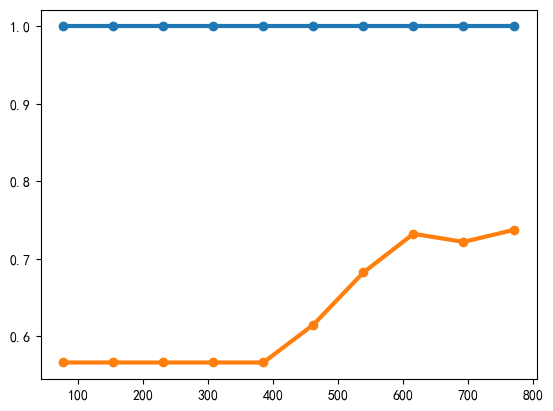

In [46]:
cv=sss
train_size,train_score,test_score=learning_curve(dec_clf,X1,y,train_sizes=np.linspace(.1,1,10),cv=cv)

train_score_mean=np.mean(train_score,axis=1)
test_score_mean=np.mean(test_score,axis=1)
train_score_std=np.std(train_score,axis=1)
test_score_std=np.std(test_score,axis=1)

plt.plot(train_size,train_score_mean,'o-',linewidth=3)
plt.plot(train_size,test_score_mean,'o-',linewidth=3)
plt.show()

# 参数寻优

SVM

In [ ]:
param_svm=[{'C':[0.0001,0.001,0.01,0.05,1,2,3],
           'gamma':[0.1,0.3,0.5,0.7,0.8,1],
           'kernel':['rbf']},
           {'C':[0.001,0.01,0.05,1,2,3,4,5],
           'kernel':['linear']},
           {'C':[0.001,0.01,0.05,1,2,3],
           'degree':[2,3,4,5,6],
            'gamma':[0.1,0.3,0.5],
           'kernel':['poly']}]
from sklearn.model_selection import GridSearchCV
svm_cv=GridSearchCV(svc_clf,param_svm,cv=5)
svm_cv.fit(X_val,y_val)
svm_clf4=svm_cv.best_estimator_

In [ ]:
svm_cv.best_params_

In [47]:
svm_clf4=SVC(kernel='rbf',probability=True,random_state=200,C=200)

In [48]:
svm_clf4.fit(X_val_train,y_val_train)
y_svm_pred=svm_clf4.predict(X_val)
print('accuracy_score',accuracy_score(y_val,y_svm_pred))

accuracy_score 0.791907514450867


In [49]:
y_svm_test=svm_clf4.predict(x_test)
accuracy_score(y_test,y_svm_test)

0.7628865979381443

In [58]:
def plot_svm_learning_score(model):
    train_size,train_score,test_score=learning_curve(model,x_train,y_train,
                                                          cv=ShuffleSplit(n_splits=50,test_size=0.2,random_state=42),
                                                         train_sizes=np.linspace(.1,1,5))
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
#     plt.fill_between(train_size,train_score_mean+train_score_std,train_score_mean-train_score_std,alpha=0.1)
#     plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1)
    
    plt.plot(train_size,train_score_mean)
    plt.plot(train_size,test_score_mean)
    
    plt.title('{}'.format(model))

In [ ]:
plot_svm_learning_score(svm_clf4)

# 逻辑回归调参

In [83]:
from sklearn.model_selection import GridSearchCV
param_log={'C':[0.001,0.01,0.1,1,1.1,1.2,1.3,1.5,2,3,4,5,8,10,100],
          'solver':['liblinear','sag','newton-cg','lbfgs']}

log_cv=GridSearchCV(log_reg,param_log,cv=5)
log_cv.fit(X_val,y_val)
log_reg4=log_cv.best_estimator_

In [84]:
log_cv.best_params_

{'C': 8, 'penalty': 'l2'}

In [50]:
log_reg4=LogisticRegression(C=8,penalty='l2',random_state=200,tol=0.1)

In [51]:
log_reg4.fit(X_val_train,y_val_train)
y_log_pred=log_reg4.predict(X_val)
print('accruacy_score',accuracy_score(y_val,y_log_pred))

accruacy_score 0.7861271676300579


In [52]:
y_log_test=log_reg4.predict(x_test)
accuracy_score(y_test,y_log_test)

0.7525773195876289

In [174]:
def find_params_log(X_val_train,y_val_train):
    accuracy=[]
    for i in [1,1.01,1.02,1.03,1.05,1.06,1.07,1.08,1.09,1.1]:
        model=LogisticRegression(C=i,penalty='l2')
        model.fit(X_val_train,y_val_train)
        y_pred=model.predict(X_val)
        accuracy.append(accuracy_score(y_val,y_pred))
    return np.argmax(accuracy)

In [175]:
def plot_log_learning_score(model):
    train_size,train_score,test_score=learning_curve(model,x_train,y_train,
                                                          cv=ShuffleSplit(n_splits=50,test_size=0.2,random_state=42),
                                                         train_sizes=np.linspace(.1,1,10))
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
#     plt.fill_between(train_size,train_score_mean+train_score_std,train_score_mean-train_score_std,alpha=0.1)
#     plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1)
    
    plt.plot(train_size,train_score_mean)
    plt.plot(train_size,test_score_mean)
    
    plt.title('{}'.format(model))


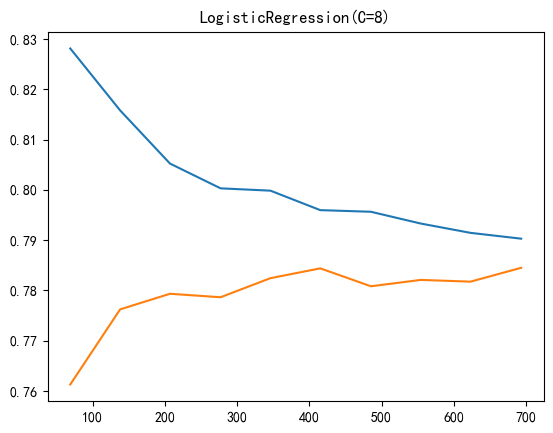

In [176]:
plot_log_learning_score(log_reg4)

# 决策树调优

In [132]:
from sklearn.model_selection import GridSearchCV
param_dec={'criterion':['entropy','gini'],
          'splitter':['best','random'],
          'max_depth':np.arange(1,10,2),
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9]
          }

dec_cv=GridSearchCV(dec_clf,param_dec,cv=5,scoring='neg_mean_absolute_error')
dec_cv.fit(X_val,y_val)

dec_clf2=dec_cv.best_estimator_
dec_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'splitter': 'best'}

In [53]:
dec_clf2=DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='random',random_state=200,min_samples_leaf=9)

In [54]:
dec_clf2.fit(X_val_train,y_val_train)
y_dec_pred=dec_clf2.predict(X_val)
accuracy_score(y_val,y_dec_pred)

0.8092485549132948

In [55]:
y_dec_test=dec_clf2.predict(x_test)
accuracy_score(y_test,y_dec_test)

0.7628865979381443

In [128]:
def plot_dec_learning_score(model):
    train_size,train_score,test_score=learning_curve(model,x_train,y_train,
                                                          cv=ShuffleSplit(n_splits=50,test_size=0.2,random_state=42),
                                                         train_sizes=np.linspace(.1,1,10))
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
#     plt.fill_between(train_size,train_score_mean+train_score_std,train_score_mean-train_score_std,alpha=0.1)
#     plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1)
    
    plt.plot(train_size,train_score_mean)
    plt.plot(train_size,test_score_mean)
    
    plt.title('{}'.format(model))

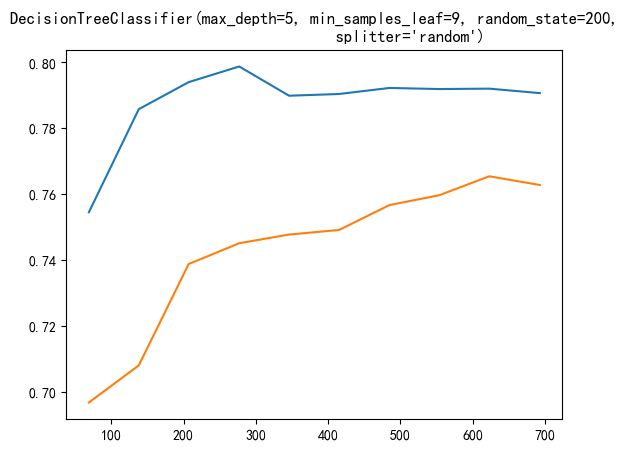

In [136]:
plot_dec_learning_score(dec_clf2)

In [109]:
import sklearn

sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [70]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [154]:
param_rf={'max_depth':range(3,9,2)}
rf_cv=GridSearchCV(rf,param_rf,cv=5,scoring='neg_mean_squared_error')
rf_cv.fit(X_val_train,y_val_train)
rf_cv.best_params_

{'max_depth': 7}

In [ ]:
def plot_rf_learning_score(model):
    train_size,train_score,test_score=learning_curve(model,x_train,y_train,
                                                          cv=ShuffleSplit(n_splits=50,test_size=0.2,random_state=42),
                                                         train_sizes=np.linspace(.1,1,5))
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
#     plt.fill_between(train_size,train_score_mean+train_score_std,train_score_mean-train_score_std,alpha=0.1)
#     plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1)
    
    plt.plot(train_size,train_score_mean)
    plt.plot(train_size,test_score_mean)
    
    plt.title('{}'.format(model))


In [ ]:
plot_

# 模型对比

In [56]:
def compare_train_test(model,num):
    model.fit(X_val_train,y_val_train)
    print('{}训练集和测试集对比'.format(model))
    y_pred_train=model.predict(X_val_train)
    y_pred_test=model.predict(X_val)
    print('accuracy_score_train',accuracy_score(y_val_train,y_pred_train))
    print('accuracy_score_test',accuracy_score(y_val,y_pred_test))
    print('precision_score_train',precision_score(y_val_train,y_pred_train))
    print('precision_score_test',precision_score(y_val,y_pred_test))
    print('recall_score_train',recall_score(y_val_train,y_pred_train))
    print('recall_score_test',recall_score(y_val,y_pred_test))
    print('f1_score_train',f1_score(y_val_train,y_pred_train))
    print('f1_score_test',f1_score(y_val,y_pred_test))
    y_pred_prob_test=model.predict_proba(X_val)[:,1]
    y_pred_prob_train=model.predict_proba(X_val_train)[:,1]
    fpr_train,tpr_train,thresholds=roc_curve(y_val_train,y_pred_prob_train)
    fpr_test,tpr_test,thresholds=roc_curve(y_val,y_pred_prob_test)
    plt.figure(figsize=(6,5),dpi=120)
    plt.plot(fpr_train,tpr_train,linewidth=3,label='TrainSet')
    plt.plot(fpr_test,tpr_test,linewidth=3,label='TestSet')
    plt.plot([0,1],[0,1],'o-',linewidth=3)
    plt.legend(loc='best')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    if num==1:
        plt.title('逻辑回归 roc曲线')
    elif num==2:
        plt.title('支持向量机 roc曲线')
    elif num==3:
        plt.title('决策树 roc曲线')
    elif num==4:
        plt.title('K近邻 roc曲线')
        
    print('roc_auc_score_train',roc_auc_score(y_val_train,y_pred_prob_train))
    print('roc_auc_score_test',roc_auc_score(y_val,y_pred_prob_test))
    plt.show()

LogisticRegression(C=8, random_state=200, tol=0.1)训练集和测试集对比
accuracy_score_train 0.7896253602305475
accuracy_score_test 0.7861271676300579
precision_score_train 0.7444794952681388
precision_score_test 0.7159090909090909
recall_score_train 0.7840531561461794
recall_score_test 0.84
f1_score_train 0.7637540453074434
f1_score_test 0.7730061349693251
roc_auc_score_train 0.8628405738293897
roc_auc_score_test 0.8948299319727891


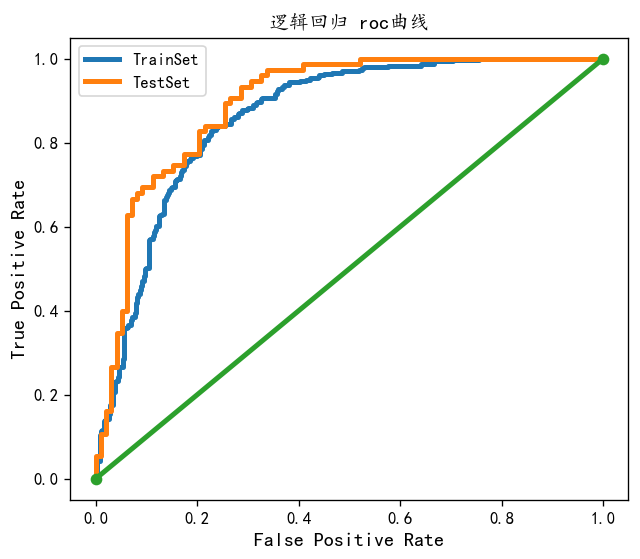

In [57]:
compare_train_test(log_reg4,1)


In [58]:
svm_clf4=SVC(kernel='linear',random_state=200,C=8,probability=True)

SVC(C=8, kernel='linear', probability=True, random_state=200)训练集和测试集对比
accuracy_score_train 0.8170028818443804
accuracy_score_test 0.838150289017341
precision_score_train 0.7620481927710844
precision_score_test 0.7831325301204819
recall_score_train 0.840531561461794
recall_score_test 0.8666666666666667
f1_score_train 0.7993680884676145
f1_score_test 0.8227848101265823
roc_auc_score_train 0.8942710050467905
roc_auc_score_test 0.9272789115646258


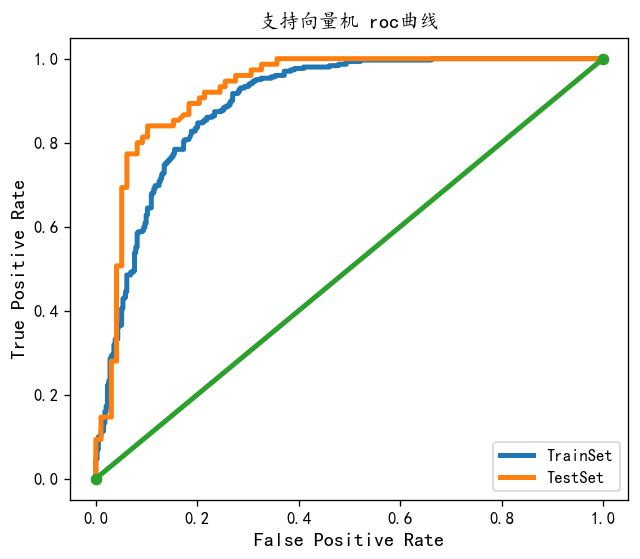

In [59]:
compare_train_test(svm_clf4,2)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, random_state=200,
                       splitter='random')训练集和测试集对比
accuracy_score_train 0.7896253602305475
accuracy_score_test 0.8092485549132948
precision_score_train 0.7341389728096677
precision_score_test 0.7692307692307693
recall_score_train 0.8073089700996677
recall_score_test 0.8
f1_score_train 0.7689873417721519
f1_score_test 0.7843137254901961
roc_auc_score_train 0.8721141572197848
roc_auc_score_test 0.8870748299319727


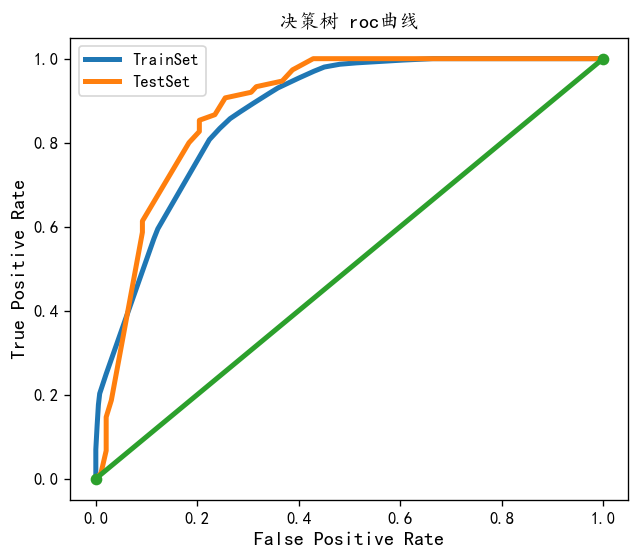

In [60]:
compare_train_test(dec_clf2,3)


# k近邻

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()

X_val_train_knn=MM_scaler.fit_transform(X_val_train)
X_val_knn=MM_scaler.fit_transform(X_val)
x_test_knn=MM_scaler.fit_transform(x_test)
knn_clf=KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_val_train_knn,y_val_train)


KNeighborsClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid_knn=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
         'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]


knn_clf=KNeighborsClassifier()

knn_cv=GridSearchCV(knn_clf,param_grid_knn,cv=5)

knn_cv.fit(X_val_train_knn,y_val_train)
knn_cv.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [63]:
knn_clf=KNeighborsClassifier(n_neighbors=7,weights='uniform')

KNeighborsClassifier(n_neighbors=7)训练集和测试集对比
accuracy_score_train 0.770893371757925
accuracy_score_test 0.7976878612716763
precision_score_train 0.7246835443037974
precision_score_test 0.7439024390243902
recall_score_train 0.760797342192691
recall_score_test 0.8133333333333334
f1_score_train 0.7423014586709885
f1_score_test 0.7770700636942677
roc_auc_score_train 0.8603087249456858
roc_auc_score_test 0.8596598639455783


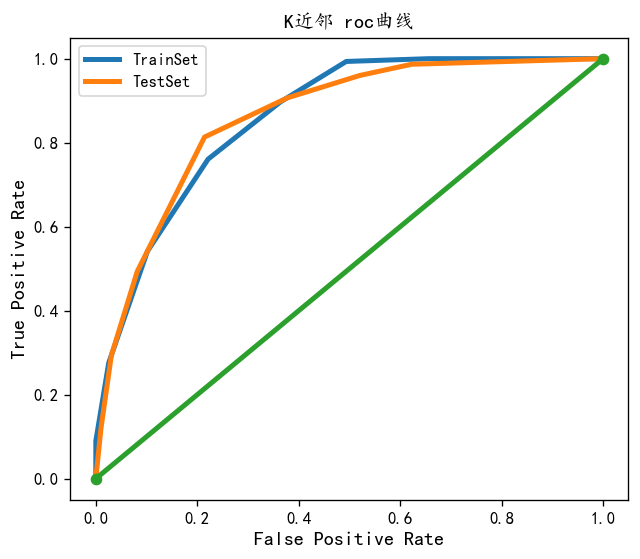

In [64]:
compare_train_test(knn_clf,num=4)

# 加权集成

In [69]:
from sklearn.ensemble import VotingClassifier
estimators={('svc',svm_clf4),
            ('log',log_reg4),
            ('dec',dec_clf2)}
vot_clf=VotingClassifier(estimators=estimators,voting='soft')
vot_clf.fit(x_train,y_train)
y_vot_pred=vot_clf.predict(x_test)
accuracy_score(y_test,y_vot_pred)

0.8144329896907216

VotingClassifier(estimators={('dec',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=9,
                                                     random_state=200,
                                                     splitter='random')),
                             ('log',
                              LogisticRegression(C=8, random_state=200,
                                                 tol=0.1)),
                             ('svc',
                              SVC(C=8, kernel='linear', probability=True,
                                  random_state=200))},
                 voting='soft')训练集和测试集对比
accuracy_score_train 0.8328530259365994
accuracy_score_test 0.8497109826589595
precision_score_train 0.7828746177370031
precision_score_test 0.7752808988764045
recall_score_train 0.8504983388704319
recall_score_test 0.92
f1_score_train 0.8152866242038216
f1_score_test 0.8414634146341463
roc_auc_score_t

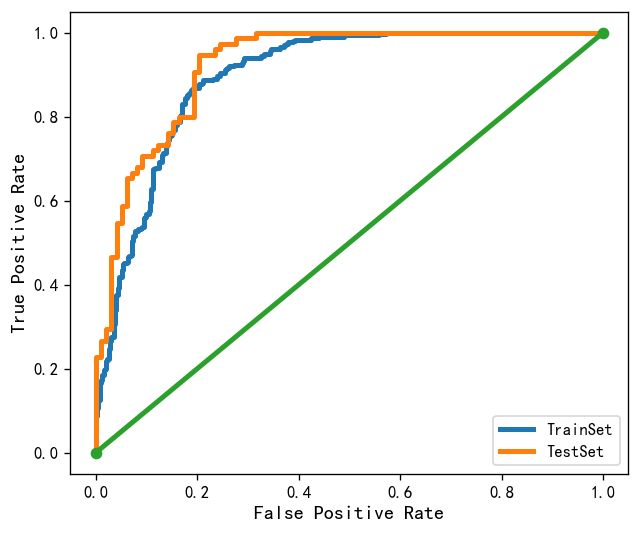

In [70]:
compare_train_test(vot_clf,num=0)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(dec_clf2,n_estimators=1000,learning_rate=0.01,random_state=200)
ada_clf.fit(x_train,y_train)
y_ada_pred=ada_clf.predict(x_test)
print(accuracy_score(y_test,y_ada_pred))
print(f1_score(y_test,y_ada_pred))
print(precision_score(y_test,y_ada_pred))

0.8144329896907216
0.7906976744186046
0.7727272727272727


# 差分进化算法

In [65]:
from scipy.optimize import differential_evolution as de
from sklearn.ensemble import VotingClassifier
import random
def essemble_f1(weights):
    weg_vot_clf=VotingClassifier(estimators=[('logis',log_reg4),('dec',dec_clf2),('svc',svm_clf4)],weights=weights,voting='soft')
    weg_vot_clf.fit(X_val_train,y_val_train)
    y_pred=weg_vot_clf.predict(x_test)
    return f1_score(y_test,y_pred)

F=[0.5,1,1.5,2]
CR=[0.75,0.8]
iteration=[50,100,150,200]

def differential_evalution_手写(models,F,CR,iteration):
    n=0
    best_score=0
    v=np.zeros((3,50))#用于储存交换个体
    u=np.zeros((3,50))#用于储存变异
    #初始化
    weights=np.random.random(150).reshape(3,50)
    while n < iteration:
        #变异
        f1_scores=np.zeros((1,50))
        range_list=list(range(50))
        r1=random.sample(range_list,4)[0]
        r2=random.sample(range_list,4)[1]
        r3=random.sample(range_list,4)[2]
        r4=random.sample(range_list,4)[3]
        for i in range(50):
            f1_scores[:,i]=essemble_f1(models,weights=weights[:,i])
            
        x_best=weights[:,np.argmax(f1_scores)]#选取适应度最佳的个体
        for i in range(50):
            u[:,i]=(x_best+F*(weights[:,r1]-weights[:,r2])+F*(weights[:,r3]-weights[:,r4]))
        #交叉操作

        for i in range(50):
            if random.random()< CR or i==random.randint(0,50):
                v[:,i]=u[:,i]
            else:
                u[:,i]=weights[:,i]

        #选择
        for i in range(50):
            if essemble_f1(models,weights=u[:,i])<essemble_f1(models,weights=weights[:,i]):
                weights[:,i]=u[:,i]
            else:
                weights[:,i]=weights[:,i]

         #输出最优解
        scores=[]
        for i in range(50):
            score_2=essemble_f1(models,weights=weights[:,i])
            scores.append(score_2)
        if np.max(scores)>best_score:
            best_score=np.max(scores)

        n+=1
    return weights[:,np.argmax(scores)]
        
        
    

In [132]:
models=[('logis',log_reg4),('dec',dec_clf2),('knn',knn_clf)]
differential_evalution(models=models,F=0.5,CR=0.75,iteration=50)

array([0.62402758, 3.74887794, 9.51469003])

In [ ]:
result=de(essemble_f1,bounds=[(0,1),(0,1),(0,1)],
                              popsize=30,maxiter=50,mutation=0.5,recombination=0.75)
best_weights=result.x


In [ ]:
best_weights

In [ ]:
essemble_f1(weights=best_weights)

In [153]:
knn_clf.fit(X_val_train_knn,y_val_train)
y_knn_pred=knn_clf.predict(x_test_knn)
f1_score(y_test,y_knn_pred)

0.782608695652174

In [66]:
vot_clf=VotingClassifier(estimators=[('logis',log_reg4),('dec',dec_clf2),('svc',svm_clf4)],voting='soft')
vot_clf.fit(X_val_train,y_val_train)
y_vot_pred=vot_clf.predict(x_test)
f1_score(y_test,y_vot_pred)

0.7710843373493976

In [69]:
from sklearn.model_selection import GridSearchCV

vot_params={'weights':[[0.1,0.3,0.6],[0.2,0.4,0.5],[0.1,0.2,0.7]]}

vot_cv=GridSearchCV(vot_clf,vot_params,cv=5)
vot_cv.fit(X_val_train,y_val_train)
vot_cv.best_params_
    

{'weights': [0.1, 0.3, 0.6]}

In [70]:
vot_clf=VotingClassifier(estimators=[('logis',log_reg4),('dec',dec_clf2),('svc',svm_clf4)],weights=[0.1,0.3,0.6],voting='soft')
vot_clf.fit(X_val_train,y_val_train)
y_vot_pred=vot_clf.predict(x_test)
f1_score(y_test,y_vot_pred)

0.7857142857142857

VotingClassifier(estimators=[('logis',
                              LogisticRegression(C=8, random_state=200,
                                                 tol=0.1)),
                             ('dec',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=9,
                                                     random_state=200,
                                                     splitter='random')),
                             ('svc',
                              SVC(C=8, kernel='linear', probability=True,
                                  random_state=200))],
                 voting='soft', weights=[0.2, 0.3, 0.5])训练集和测试集对比
accuracy_score_train 0.8314121037463977
accuracy_score_test 0.8323699421965318
precision_score_train 0.7804878048780488
precision_score_test 0.7674418604651163
recall_score_train 0.8504983388704319
recall_score_test 0.88
f1_score_train 0.8139904610492845
f1_score_test 0.81987

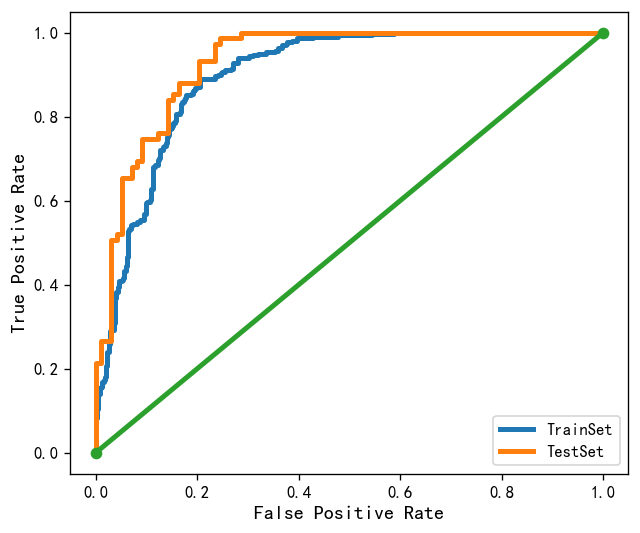

In [74]:
compare_train_test(vot_clf,num=0)

In [73]:
vot_clf=VotingClassifier(estimators=[('logis',log_reg4),('dec',dec_clf2),('svc',svm_clf4)],weights=[0.2,0.3,0.5],voting='soft')
vot_clf.fit(X_val_train,y_val_train)
y_vot_pred=vot_clf.predict(x_test)
f1_score(y_test,y_vot_pred)

0.7710843373493976